<a href="https://colab.research.google.com/github/ElenaGomezB/AA_PRACTICA1_GRUPO_10/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 1**

GRUPO 10
 
Elena Gómez

Ana Muñoz

### **OBJETIVO**

Crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. 

En primer lugar tenemos que crear un modelo en Keras aplicando el conjunto de datos Fashion-MNIST.

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. 

El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles). Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes

- Importamos tensorflow y comprobamos que la versión es 2.0.0 o superior 

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.6.0
GPU Available: []
2.6.0


- A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que a cada posición se le asigna el nombre de cada prenda. ('class_names')

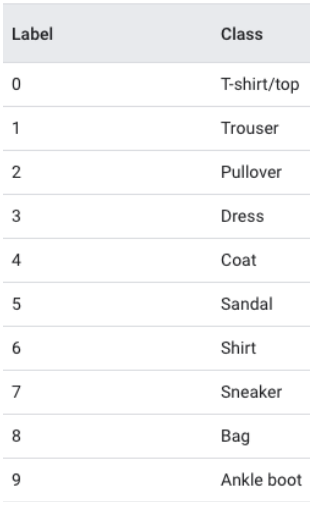

In [3]:
# Importamos las imágenes
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



4431872/4422102 [==============================] - 0s 0us/step



- Estudiamos los **datos de entrenamiento**


In [4]:
print(train_images.shape)

(60000, 28, 28)


In [5]:
# Vemos la matriz de la imagen 50000 de las imágenes de entrenamiento
train_images[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

In [6]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [7]:
#Sacamos la etiqueta de la imagen 50000
train_labels[5000]

4

Imprimimos la imagen 5000 por pantalla utilizando matplotlib, y nos damos cuenta que corresponde con el elemento 4 de nuestro vector, es decir, un abrigo.

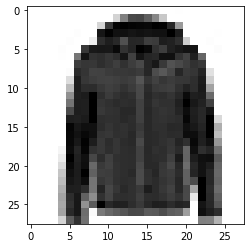

In [8]:
import matplotlib.pyplot as plt
digit = train_images[5000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

- Estudiamos los **datos de prueba**

In [9]:
print(test_images.shape)

(10000, 28, 28)


In [10]:
# Vemos la matriz de la imagen 8000 de las imágenes de prueba
test_images[8000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
#Sacamos la etiqueta de la imagen 8000
test_labels[8000]

7

Imprimimos la imagen 8000 por pantalla utilizando matplotlib, y vemos que corresponde con el elemento 7 de nuestro vector, una zapatilla.

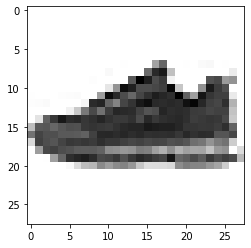

In [13]:
digit = test_images[8000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### **CREAMOS LAS RNA**

Una vez estudiado los datos vamos a crear 8 modelos diferentes de RNA,  los cuales van a ser definidos, configurados, entrenados, evaluados y mejorados para posteriormente usarlos para hacer predicciones.

Para todos los modelos la red sera secuencial y tendrá dos capas tipo Dense (densamente conectadas). Cambiaremos el optimizador, la función de activación y el número de neuronas de la primera capa.

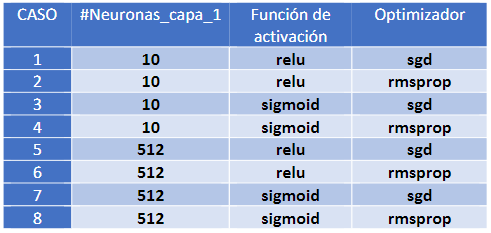

Cada una de las neuronas de la capa de entrada están conectadas con los 784 píxeles de cada imagen (28*28). Solo lo 
definimos para la primera capa, para la segunda capa y posteriores, Keras lo 
deduce.

Para todos los modelos, la segunda capa tendrá la función de activación "softmax" de 10 vías (o neuronas), en la que la salida de cada neurona corresponde a la probabilidad estimada de la clase correspondiente. Dada una imagen de entrada, obtendremos las probabilidades de que sea cada uno de las 10 posibles prendas. 



- Para los cuatro primeros modelos, la primera capa tendrá 10 neuronas.

In [14]:
from keras import models
from keras import layers

**MODELO 1**

In [15]:
#función de activación: relu
#optimizador: sgd
network1 = models.Sequential()
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network1.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network1.summary()
# 7850 = 784 x 10 + 10 Sesgo
# 110 = 10 x 10 + 10 Sesgo
# 7960 = 7850 + 110


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 2**

In [16]:
#función de activación: relu
#optimizador: rmsprop
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network2.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 3**

In [17]:
##función de activación: sigmoid
#optimizador: sgd
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network3.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 4**

In [18]:
#función de activación: sigmoid
#optimizador: rmsprop
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network4.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


- Para los cuatro últimos modelos, la primera capa tendrá 512 neuronas.

**MODELO 5**

In [19]:
#función de activación: relu
#optimizador: sgd
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name = 'capa1'))
network5.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network5.summary()
# 401920 = 784 x 512 + 512 Sesgo
# 5130 = 512 x 512 + 512 Sesgo
# 407050 = 401920 + 5130

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**MODELO 6**

In [20]:
#función de activación: relu
#optimizador: rmsprop
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name = 'capa1'))
network6.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**MODELO 7**

In [21]:
#función de activación: sigmoid
#optimizador: sgd
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network7.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network7.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**MODELO 8**

In [22]:
#función de activación: sigmoid
#optimizador: rmsprop
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network8.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network8.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**COMPILACIÓN**

* Para el algoritmo optimizador utilizamos '**rmsprop**' (Root Mean Square 
Propagation), o '**sgd**' (Stocastic Gradient Descendent), dependiendo del modelo.

* Para la función de pérdida elegimos **spars_categorical_crossentropy** que se utiliza como señal de retroalimentación para aprender los tensores de peso y que la fase de entrenamiento se intente minimizar.

* Para la precisión utilizaremos **accuracy**: Solo tendremos en cuenta la fracción de imágenes que son correctamente clasificadas.


In [23]:
network1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [24]:
network2.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [25]:
network3.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
network4.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [27]:
network5.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [28]:
network6.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
network7.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [30]:
network8.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### **TRANSFORMACIÓN DATOS**

Antes del entrenamiento, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1]. Pasando de una matriz de forma (60000, 28, 28) con valores en el intervalo [0, 255] a una matriz de forma float32 con forma (60000, 28 * 28) con valores entre 0 y 1

In [31]:
# PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION

# Cambiamos el tamaño de las imágenes de entrenamiento 
train_images = train_images.reshape((60000, 28 * 28))
train_images, len(train_images), train_images.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 60000, (60000, 784))

In [32]:
# Convertimos los valores de las matrices en valores entre 0 y 1
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[50000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0

In [33]:
# Repetimos los pasos anteriores para las imágenes de prueba
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### **PREPARACIÓN DE ETIQUETAS**

Como hemos elegido la función de pérdida **spars_categorical_cossentropy** no necesitamos preprocesamiento de los datos, es decir, nos permite usar numeros enteros, por ello usamos la función Flatten.

La función `Flatten`, transforma el vector de entrada en uno unidimensional, manteniendo todos los valores en el vector. 

Por ejemplo, un vector (muestras, 10, 20, 1) se aplanará a (muestras, 10 * 20 * 1).



In [34]:
network1.add(layers.Flatten(input_shape=(28,28)))
network2.add(layers.Flatten(input_shape=(28,28)))
network3.add(layers.Flatten(input_shape=(28,28)))
network4.add(layers.Flatten(input_shape=(28,28)))
network5.add(layers.Flatten(input_shape=(28,28)))
network6.add(layers.Flatten(input_shape=(28,28)))
network7.add(layers.Flatten(input_shape=(28,28)))
network8.add(layers.Flatten(input_shape=(28,28)))

### **Entrenamos las redes de neuronas**

Utilizamos la función `fit` que devuelve los valores de pérdida y de precisión de la red para las imágenes de entrenamiento.


In [35]:
network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.5351 - accuracy: 0.4669
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9113 - accuracy: 0.6781
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7575 - accuracy: 0.7361
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.7698
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6268 - accuracy: 0.7876


In [36]:
network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8990 - accuracy: 0.7058
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5343 - accuracy: 0.8174
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4816 - accuracy: 0.8328
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4551 - accuracy: 0.8435
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4384 - accuracy: 0.8480


In [37]:
network3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1402 - accuracy: 0.2905
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8530 - accuracy: 0.5263
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6700 - accuracy: 0.6239
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5174 - accuracy: 0.6492
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3897 - accuracy: 0.6645


In [38]:
network4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.4322 - accuracy: 0.6036
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8670 - accuracy: 0.7339
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6690 - accuracy: 0.8015
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5641 - accuracy: 0.8259
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5053 - accuracy: 0.8375


In [39]:
network5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.0166 - accuracy: 0.6818
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6631 - accuracy: 0.7850
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5833 - accuracy: 0.8104
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5401 - accuracy: 0.8212
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5123 - accuracy: 0.8292


In [40]:
network6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5522 - accuracy: 0.8052
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3812 - accuracy: 0.8610
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3343 - accuracy: 0.8773
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3083 - accuracy: 0.8872
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2897 - accuracy: 0.8932


In [41]:
network7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.7031 - accuracy: 0.5843
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 1.1285 - accuracy: 0.7084
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.9251 - accuracy: 0.7295
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.8243 - accuracy: 0.7420
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7630 - accuracy: 0.7523


In [42]:
network8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5926 - accuracy: 0.7918
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4281 - accuracy: 0.8450
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3867 - accuracy: 0.8591
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3592 - accuracy: 0.8691
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3411 - accuracy: 0.8748


**Verificamos nuestros modelo ya entrenado**

Ahora verificamos que nuestros modelos también funcionan bien para los datos de prueba

In [43]:
test_loss1, test_acc1 = network1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.6316 - accuracy: 0.7823


In [44]:
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.8352


In [45]:
test_loss3, test_acc3 = network3.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.3421 - accuracy: 0.6656


In [46]:
test_loss4, test_acc4 = network4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.5160 - accuracy: 0.8293


In [47]:
test_loss5, test_acc5 = network5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5261 - accuracy: 0.8215


In [48]:
test_loss6, test_acc6 = network6.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3669 - accuracy: 0.8719


In [49]:
test_loss7, test_acc7 = network7.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.7532 - accuracy: 0.7465


In [50]:
test_loss8, test_acc8 = network8.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8522


Vemos que los modelo 3 y 7 (sigmoid, sgd) son los peores ya que tienen la mayor pérdida y es bastante alta (1.3897, 0.7630)

Por otro lado, podemos observar que los mejores modelos son aquellos cuyo optimizador es rmsprop, por tanto, deducimos que para nuestro caso, es mejor utilizar dicho optimizador antes que sgd.

También nos fijamos que lo modelos cuya función de activación es relu, son mejores frente a aquellos cuya función de activación es sigmoid.

**En conclusión, los mejores modelos son el 2 y el 6, que coinciden con la función de activación relu y optimizador rmsprop**



###**CASO 2 Y 7 MULTIPLICANDO POR 5 LAS ÉPOCAS DE ENTRENAMIENTO**


Creamos una "copia" de las redes 2 y 7 para poder hacer las 25 iteraciones, si le aplicamos las 25 iteraciones a la red, al ya estar entrenada no empieza desde 0, en nuestro caso, empieza con las 5 iteraciones ya hechas, por lo que no estaría haciendo 25 sino 30.

**MODELO 2**

In [51]:
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network22.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network22.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [52]:
network22.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [53]:
network22.add(layers.Flatten(input_shape=(28,28)))

In [54]:
network22.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 2ms/step - loss: 0.8300 - accuracy: 0.7206
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.8187
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.8324
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.8403
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.8456
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4334 - accuracy: 0.8486
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8512
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.8533
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8544
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8558

Aunque esperabamos un sobreentrenamiento del modelo, vemos que lo que ocurre es que a partir de la vuelta 13/14, el valor de pérdida y de precisión apenas varían.

**MODELO 7**

In [55]:
network77 = models.Sequential()
network77.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name = 'capa1'))
network77.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network77.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [56]:
network77.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [57]:
network77.add(layers.Flatten(input_shape=(28,28)))

In [58]:
network77.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 8ms/step - loss: 1.0151 - accuracy: 0.6961
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6570 - accuracy: 0.7911
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5798 - accuracy: 0.8120
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5388 - accuracy: 0.8220
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5126 - accuracy: 0.8292
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4935 - accuracy: 0.8343
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4786 - accuracy: 0.8383
Epoch 8/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4668 - accuracy: 0.8419
Epoch 9/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4569 - accuracy: 0.8450
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4491 - accuracy: 0.8473

Del mismo modo, podemos observar que cuantas más iteraciones, más precisión tiene, aunque va aumentando cada vez más lentamente. En cuanto a la pérdida, a más iteraciones, menos pérdida, al igual que con la precisión, cada vez la pérdida aunque se reduce, se reduce menos.

### **PREDICCIONES**

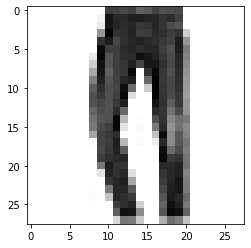

In [59]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [60]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print(test_labels)
test_labels = to_categorical(test_labels)
print(test_labels)


[9 2 1 ... 8 1 5]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Hacemos predicciones sobre la 6ª imagen de test en cada modelo

**MODELO 1**

In [61]:
import numpy as np
predictions1 = network1.predict(test_images)
print(np.argmax(predictions1[5]))
print(predictions1[5])
np.sum(predictions1[5])
print(predictions1)

1
[4.57584672e-03 9.57561672e-01 1.17161395e-02 5.48321893e-03
 1.89757403e-02 3.14253441e-07 1.66998606e-03 1.55387458e-09
 1.59456522e-05 1.05232675e-06]
[[4.81662777e-04 5.87862473e-07 2.09963345e-03 ... 2.56746858e-01
  1.33376308e-02 5.23105621e-01]
 [1.75426219e-04 1.77687150e-04 8.40542734e-01 ... 3.68993739e-07
  1.22555508e-03 8.50545985e-06]
 [1.13147806e-04 9.97199416e-01 1.44434010e-03 ... 3.04906382e-12
  9.32128685e-08 4.16304857e-08]
 ...
 [8.38505328e-02 1.51233852e-03 3.91100980e-02 ... 1.21854274e-02
  5.35209656e-01 1.77057751e-03]
 [7.73800653e-04 9.53541934e-01 1.22808497e-02 ... 9.94029836e-09
  8.74784575e-07 8.99420047e-06]
 [5.09297708e-03 3.10392534e-05 1.43285068e-02 ... 3.68812323e-01
  1.17394008e-01 8.91956612e-02]]


**MODELO 2**

In [62]:
predictions2 = network2.predict(test_images)
print(np.argmax(predictions2[5]))
print(predictions2[5])
np.sum(predictions2[5])
print(predictions2)

1
[1.4289540e-03 9.7334564e-01 1.0690044e-02 1.3007351e-02 1.4724879e-03
 9.2362923e-11 4.8939386e-05 3.4511758e-09 3.9354159e-06 2.5873285e-06]
[[1.62940864e-07 8.87510936e-08 1.48565618e-07 ... 2.12024778e-01
  4.71936958e-03 6.54584706e-01]
 [3.47700203e-04 2.26535326e-06 9.29808319e-01 ... 4.91215202e-09
  7.54589390e-04 4.10245882e-08]
 [3.13707073e-06 9.99545276e-01 3.01062886e-04 ... 1.33837841e-12
  8.09150613e-09 9.07542841e-09]
 ...
 [4.13915478e-02 2.93603080e-06 2.22830730e-03 ... 7.54975554e-05
  7.22184420e-01 8.99337556e-06]
 [6.15583167e-06 9.95542943e-01 2.69825716e-04 ... 4.74372173e-11
  2.02551043e-08 7.74892555e-07]
 [1.56860879e-05 2.81674920e-06 2.08387592e-05 ... 5.75927272e-02
  1.27933305e-02 3.82067985e-03]]


**MODELO 3**

In [63]:
predictions3 = network3.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions3[5])
np.sum(predictions3[5])
print(predictions3)

1
[0.14196047 0.38312048 0.04736675 0.23000926 0.05074067 0.03034669
 0.06805602 0.01579951 0.02107084 0.01152934]
[[0.042873   0.0122388  0.06591626 ... 0.1847762  0.11985838 0.23824795]
 [0.07758359 0.02499128 0.3054458  ... 0.01849477 0.11550385 0.07960677]
 [0.10007446 0.5107268  0.033713   ... 0.01170934 0.01442807 0.00703251]
 ...
 [0.17785858 0.06237302 0.07416976 ... 0.04684654 0.12625556 0.03864946]
 [0.11162487 0.43088812 0.03371412 ... 0.01769736 0.01753897 0.00839514]
 [0.03070033 0.01449844 0.06204083 ... 0.24196161 0.14300668 0.10553344]]


**MODELO 4**

In [64]:
predictions4 = network4.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions4[5])
np.sum(predictions4[5])
print(predictions4)

1
[2.1147321e-03 9.8472703e-01 2.8661971e-03 2.5613990e-03 2.6889646e-03
 1.8240251e-03 2.1669532e-03 5.9482089e-04 2.7283755e-04 1.8305014e-04]
[[2.17316812e-03 3.01961182e-03 4.49272135e-04 ... 1.00386657e-01
  1.32719828e-02 5.92463791e-01]
 [1.97679382e-02 2.27689720e-03 7.14752436e-01 ... 4.46733693e-03
  7.60912010e-03 2.41100934e-05]
 [6.24921988e-04 9.91909683e-01 8.26079107e-04 ... 1.21092366e-04
  8.76987324e-05 1.57383314e-04]
 ...
 [2.97402162e-02 1.88512553e-04 3.34573444e-03 ... 3.31028961e-02
  6.90950096e-01 5.50823249e-02]
 [6.15781813e-04 9.87015247e-01 6.54961390e-04 ... 7.71520063e-05
  4.92019062e-05 3.12254444e-04]
 [1.34877639e-03 3.60444398e-03 4.69415309e-03 ... 1.47855803e-01
  1.73701309e-02 1.59400869e-02]]


**MODELO 5**

In [65]:
predictions5 = network5.predict(test_images)
print(np.argmax(predictions5[5]))
print(predictions5[5])
np.sum(predictions5[5])
print(predictions5)

1
[6.5452820e-03 9.7689921e-01 9.7827381e-04 2.2948540e-03 1.1857779e-02
 3.6779813e-06 1.3866732e-03 4.6008454e-06 2.6885589e-05 2.7956496e-06]
[[7.2433497e-05 4.4076238e-05 2.3894176e-04 ... 2.9736105e-01
  1.4778769e-02 5.1926583e-01]
 [4.0427668e-04 2.8658475e-05 9.2729753e-01 ... 5.9345926e-08
  1.4708239e-04 5.5032950e-07]
 [1.4034878e-04 9.9942976e-01 3.1114865e-05 ... 4.6947505e-07
  1.0793844e-06 7.6255127e-08]
 ...
 [6.1439462e-02 3.3683798e-04 3.6428426e-03 ... 1.3764290e-03
  7.3554260e-01 1.4265543e-03]
 [5.3743715e-04 9.7516632e-01 4.9533776e-04 ... 4.3668486e-05
  2.7038874e-05 3.8117796e-05]
 [1.3886178e-03 1.8531781e-03 3.1517399e-03 ... 4.0151885e-01
  5.8055457e-02 5.6709915e-02]]


**MODELO 6**

In [66]:
predictions6 = network6.predict(test_images)
print(np.argmax(predictions6[5]))
print(predictions6[5])
np.sum(predictions6[5])
print(predictions6)

1
[1.9043448e-05 9.9997354e-01 1.5701872e-08 5.5595974e-06 6.5588176e-07
 1.4874293e-11 1.1031443e-06 2.4770360e-15 3.5692824e-10 8.6342032e-15]
[[3.50710962e-07 2.75519652e-09 7.44792246e-08 ... 5.44877164e-02
  4.92656909e-05 8.77751887e-01]
 [1.64891208e-05 8.32166114e-10 9.98878181e-01 ... 1.39096301e-09
  1.59784737e-08 2.23114647e-12]
 [1.30951435e-07 9.99998927e-01 1.83962706e-11 ... 3.93746864e-18
  1.76114921e-11 9.14040698e-18]
 ...
 [1.05395029e-05 1.82571406e-13 9.72151793e-06 ... 5.12073314e-07
  9.99869704e-01 2.05631467e-09]
 [1.25541888e-07 9.99701083e-01 8.48043080e-10 ... 2.89614708e-12
  3.59007721e-08 5.70272432e-12]
 [7.49261608e-06 1.37960342e-07 1.65450601e-05 ... 1.51993865e-02
  3.51147261e-03 5.77830833e-05]]


**MODELO 7**

In [67]:
predictions7 = network7.predict(test_images)
print(np.argmax(predictions7[5]))
print(predictions7[5])
np.sum(predictions7[5])
print(predictions7)

1
[5.1464576e-02 8.0932301e-01 1.3398713e-02 6.3444711e-02 3.1846289e-02
 8.0115563e-04 2.8479286e-02 3.4834765e-04 7.2070904e-04 1.7319663e-04]
[[1.3840484e-03 6.5404014e-04 3.7166476e-03 ... 1.9444622e-01
  5.7564843e-02 3.4157076e-01]
 [5.6278515e-03 1.4697560e-04 7.7022308e-01 ... 6.0605467e-05
  7.3519414e-03 6.8162853e-04]
 [4.2025954e-03 9.6610492e-01 1.3343536e-03 ... 7.9848091e-05
  8.5481937e-05 2.8067407e-05]
 ...
 [2.5199804e-01 1.4673478e-02 1.3302451e-02 ... 5.6836419e-03
  1.8867862e-01 1.0881095e-02]
 [1.3014290e-02 7.3091745e-01 3.7723908e-03 ... 1.0362023e-03
  4.8980303e-04 6.1116897e-04]
 [5.1575620e-03 4.6468484e-03 1.5408709e-02 ... 2.9648420e-01
  6.3655846e-02 5.2879177e-02]]


**MODELO 8**

In [68]:
predictions8 = network8.predict(test_images)
print(np.argmax(predictions8[5]))
print(predictions8[5])
np.sum(predictions8[5])
print(predictions8)

1
[5.0932947e-03 9.9353653e-01 2.1551183e-04 2.3484071e-04 6.0005061e-04
 5.1979470e-09 3.0699422e-04 1.5849013e-06 1.1133656e-05 1.0174156e-08]
[[1.00734826e-06 1.61051634e-08 3.45911099e-06 ... 2.53447667e-02
  2.54774466e-04 9.56466377e-01]
 [1.31156098e-03 3.73205665e-07 9.64600325e-01 ... 3.46235396e-08
  3.17581253e-05 2.29520349e-08]
 [1.40154822e-04 9.99783337e-01 1.50026199e-05 ... 6.51708319e-07
  1.31522586e-06 1.58402413e-09]
 ...
 [1.25734825e-02 1.66995832e-07 1.12156349e-03 ... 2.65490264e-04
  9.45598960e-01 4.56374266e-07]
 [4.26727001e-06 9.99679565e-01 3.59186629e-06 ... 1.56349847e-06
  3.36326366e-07 4.90570642e-07]
 [1.47826031e-05 2.16423217e-07 2.12589628e-04 ... 1.40142478e-02
  2.11254647e-03 1.43088575e-04]]


Se puede comprobar que todos los modelos predicen de manera correcta que la imagen 6 es el elemento 1 de nuestro vector (pantalones), pero si nos fijamos en el vector de probabilidades, obeservamos que en todos excepto el 3 y el 7, la probabilidad de que sea 1 es bastante más grande que el resto de probabilidades

Ahora vamos a graficar las predicciones de la imagen 6 en cada modelo

In [69]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [70]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


predictions1 = network1.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)


**Graficamos las predicciones**

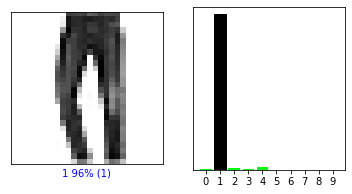

In [71]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

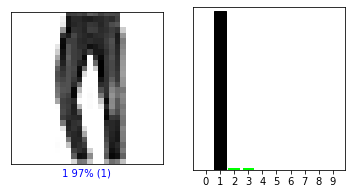

In [72]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  test_labels)
plt.show()


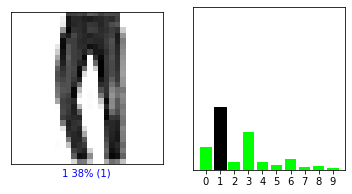

In [73]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions3[i],  test_labels)
plt.show()

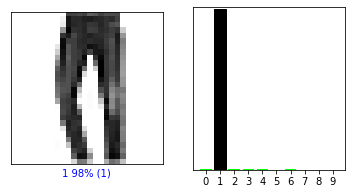

In [74]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions4[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions4[i],  test_labels)
plt.show()

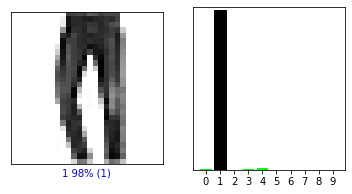

In [75]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions5[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions5[i],  test_labels)
plt.show()

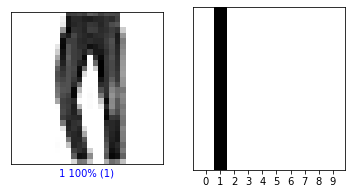

In [76]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions6[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions6[i],  test_labels)
plt.show()

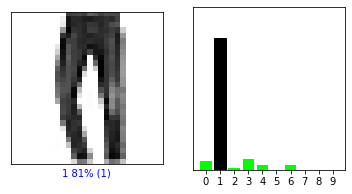

In [77]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions7[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions7[i],  test_labels)
plt.show()

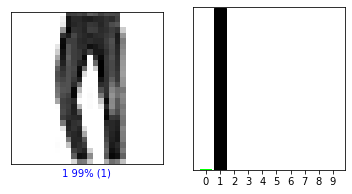

In [78]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions8[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions8[i],  test_labels)
plt.show()

Como hemos explicado antes, en estos gráficos observamos de nuevo que el modelo 3 predice de manera correcta que prenda es, pero con un porcentaje relativamente bajo.

### **PREDICCIONES DE LAS 10 PRIMERAS IMÁGENES**



Vemos la predicción, igual que el gráfico anterior, de las 10 primeras imágenes del conjunto de test, para cada uno de los 8 casos.

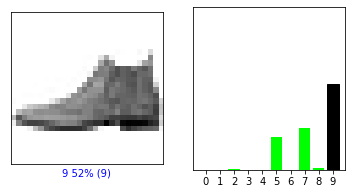

<Figure size 432x288 with 0 Axes>

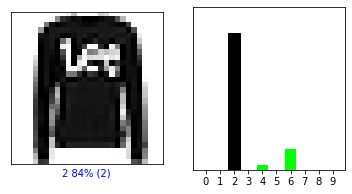

<Figure size 432x288 with 0 Axes>

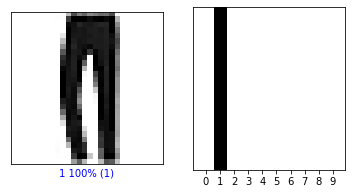

<Figure size 432x288 with 0 Axes>

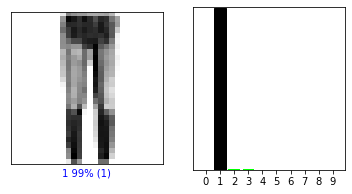

<Figure size 432x288 with 0 Axes>

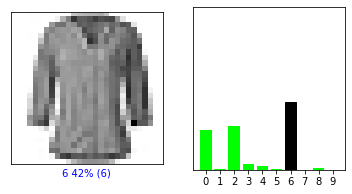

<Figure size 432x288 with 0 Axes>

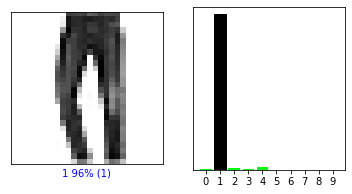

<Figure size 432x288 with 0 Axes>

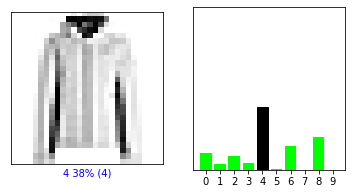

<Figure size 432x288 with 0 Axes>

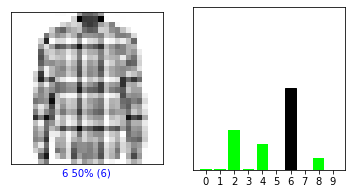

<Figure size 432x288 with 0 Axes>

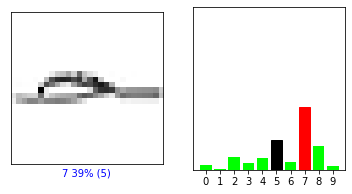

<Figure size 432x288 with 0 Axes>

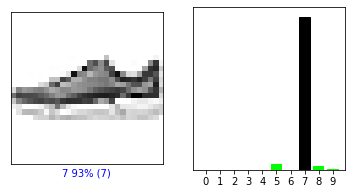

<Figure size 432x288 with 0 Axes>

In [79]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions1[i],  test_labels)
    plt.show()
    plt.clf()
    

En este modelo, aunque la precisión era alta, la pérdida era de aproximadamente 0.6, lo cual explica que en el caso de la penúltima imagen llegue a cometer error. 

Por otra parte, el optimizador de este modelo es sgd, que como hemos explicado antes, para nuestro caso, es peor que rmsprop.

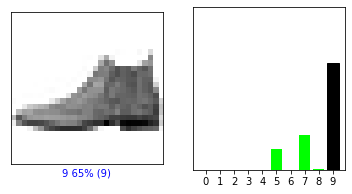

<Figure size 432x288 with 0 Axes>

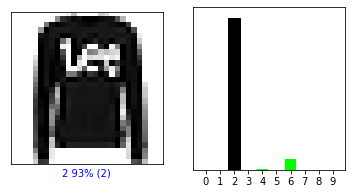

<Figure size 432x288 with 0 Axes>

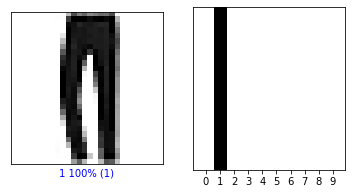

<Figure size 432x288 with 0 Axes>

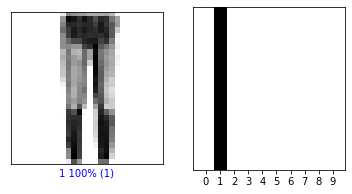

<Figure size 432x288 with 0 Axes>

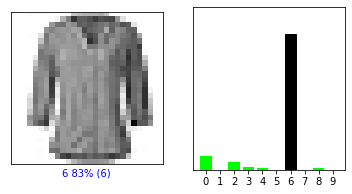

<Figure size 432x288 with 0 Axes>

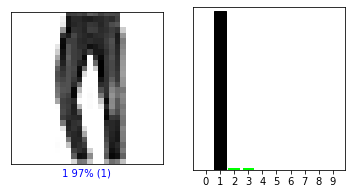

<Figure size 432x288 with 0 Axes>

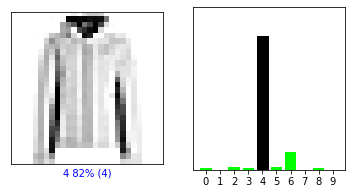

<Figure size 432x288 with 0 Axes>

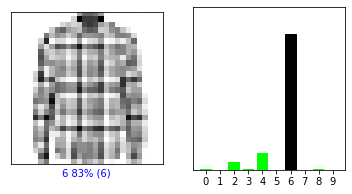

<Figure size 432x288 with 0 Axes>

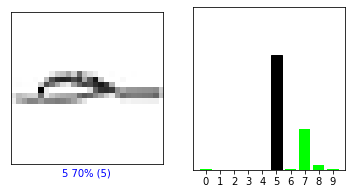

<Figure size 432x288 with 0 Axes>

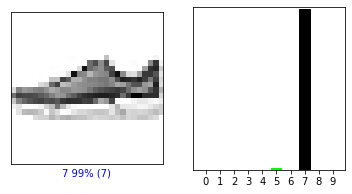

<Figure size 432x288 with 0 Axes>

In [80]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions2[i],  test_labels)
    plt.show()
    plt.clf()

En el modelo dos, observamos que en la mayoría acierta con más de un 90% de precisión, llegando al 100% en algunos casos.

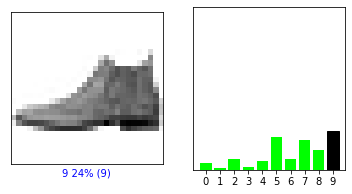

<Figure size 432x288 with 0 Axes>

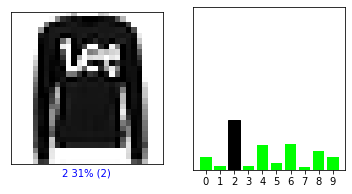

<Figure size 432x288 with 0 Axes>

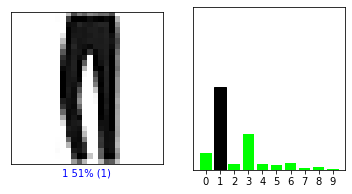

<Figure size 432x288 with 0 Axes>

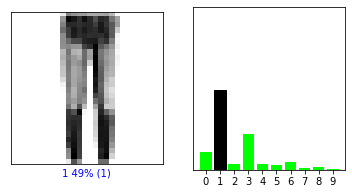

<Figure size 432x288 with 0 Axes>

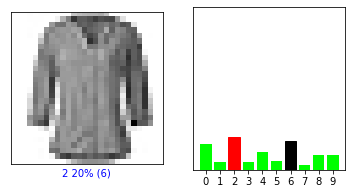

<Figure size 432x288 with 0 Axes>

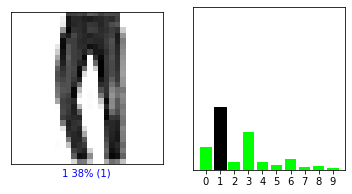

<Figure size 432x288 with 0 Axes>

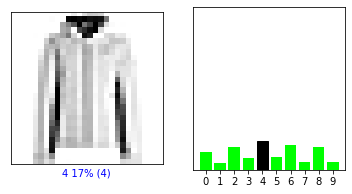

<Figure size 432x288 with 0 Axes>

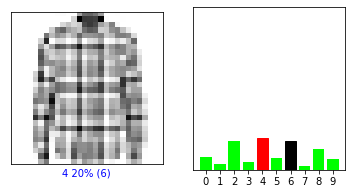

<Figure size 432x288 with 0 Axes>

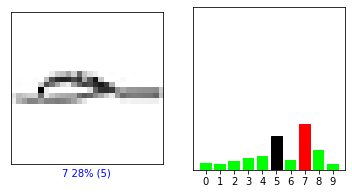

<Figure size 432x288 with 0 Axes>

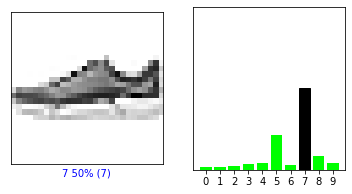

<Figure size 432x288 with 0 Axes>

In [81]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions3[i],  test_labels)
    plt.show()
    plt.clf()


En el caso del modelo 3, podemos ver que en varias predicciones llega a confundir algunas prendas con otras. El caso más destacable es el penúltimo, en el que confunde una sandalia con una zapatilla.

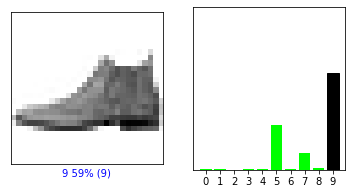

<Figure size 432x288 with 0 Axes>

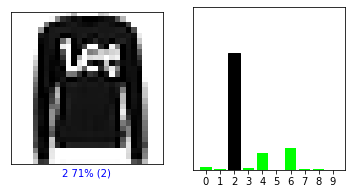

<Figure size 432x288 with 0 Axes>

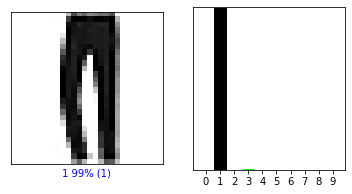

<Figure size 432x288 with 0 Axes>

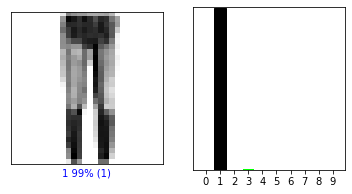

<Figure size 432x288 with 0 Axes>

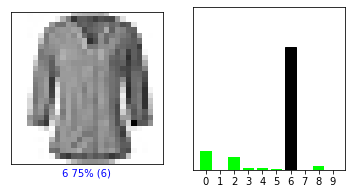

<Figure size 432x288 with 0 Axes>

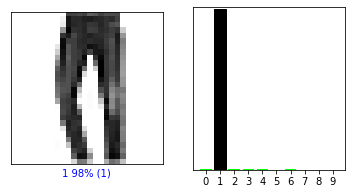

<Figure size 432x288 with 0 Axes>

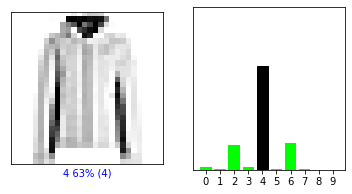

<Figure size 432x288 with 0 Axes>

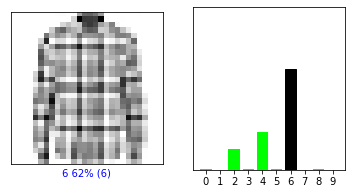

<Figure size 432x288 with 0 Axes>

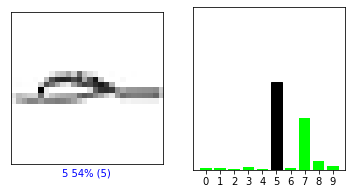

<Figure size 432x288 with 0 Axes>

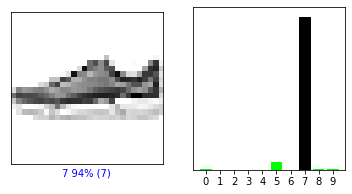

<Figure size 432x288 with 0 Axes>

In [82]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions4[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions4[i],  test_labels)
    plt.show()
    plt.clf()

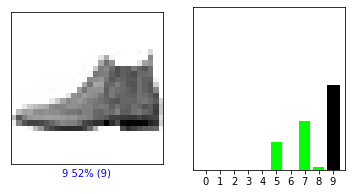

<Figure size 432x288 with 0 Axes>

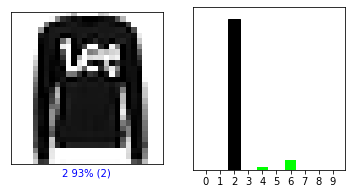

<Figure size 432x288 with 0 Axes>

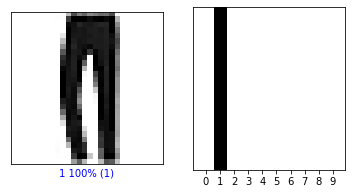

<Figure size 432x288 with 0 Axes>

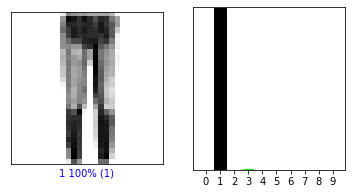

<Figure size 432x288 with 0 Axes>

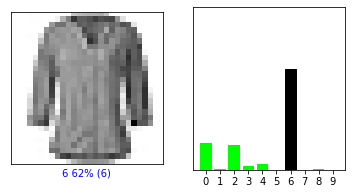

<Figure size 432x288 with 0 Axes>

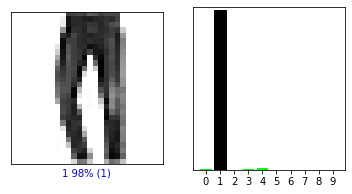

<Figure size 432x288 with 0 Axes>

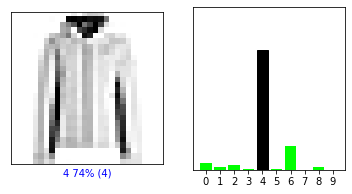

<Figure size 432x288 with 0 Axes>

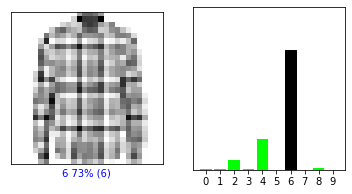

<Figure size 432x288 with 0 Axes>

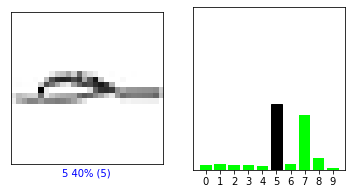

<Figure size 432x288 with 0 Axes>

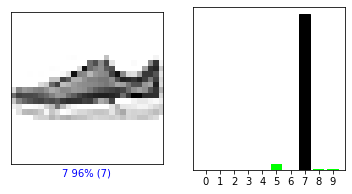

<Figure size 432x288 with 0 Axes>

In [83]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions5[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions5[i],  test_labels)
  plt.show()
  plt.clf()

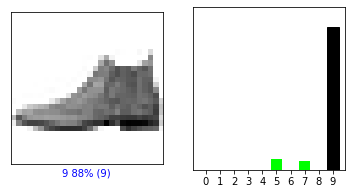

<Figure size 432x288 with 0 Axes>

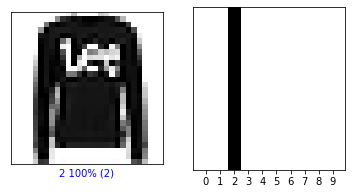

<Figure size 432x288 with 0 Axes>

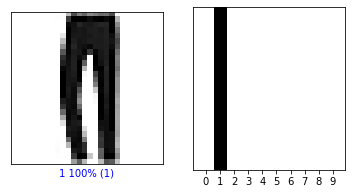

<Figure size 432x288 with 0 Axes>

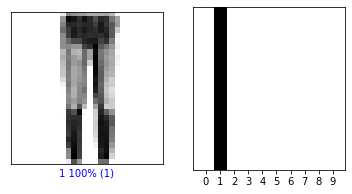

<Figure size 432x288 with 0 Axes>

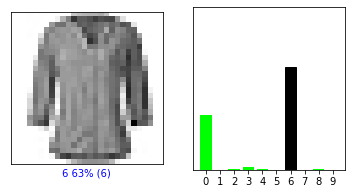

<Figure size 432x288 with 0 Axes>

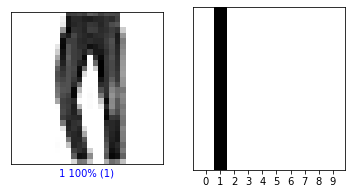

<Figure size 432x288 with 0 Axes>

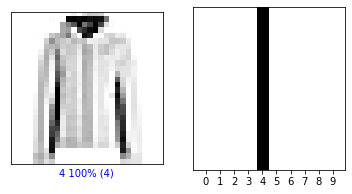

<Figure size 432x288 with 0 Axes>

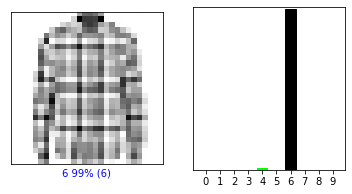

<Figure size 432x288 with 0 Axes>

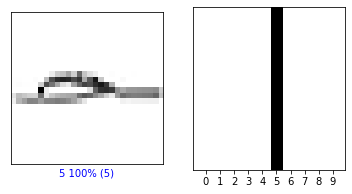

<Figure size 432x288 with 0 Axes>

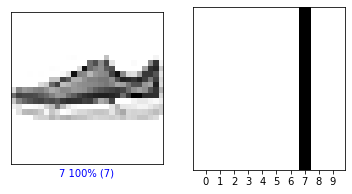

<Figure size 432x288 with 0 Axes>

In [84]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions6[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions6[i],  test_labels)
  plt.show()
  plt.clf()

Observamos que el modelo de la red neuronal 6 hace muy buenas predicciones, si nos fijamos su precisión al entrenarla era de 0.8932 y su pérdida de 0.2897. 

Vemos que en lo que más se confunde es entre camisetas y camisas, lo cual es lógico ya que tienen mucho parecido; en lo demás lo predice casi al 100% correctamente.

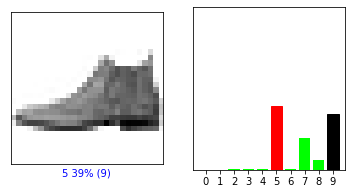

<Figure size 432x288 with 0 Axes>

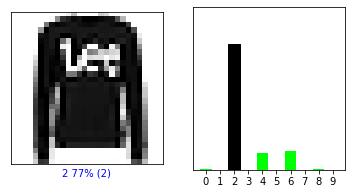

<Figure size 432x288 with 0 Axes>

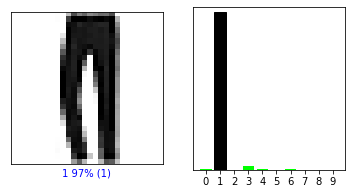

<Figure size 432x288 with 0 Axes>

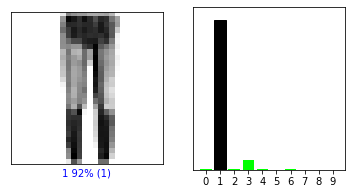

<Figure size 432x288 with 0 Axes>

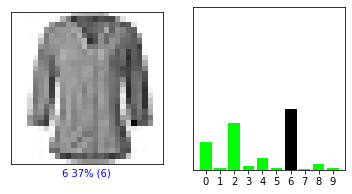

<Figure size 432x288 with 0 Axes>

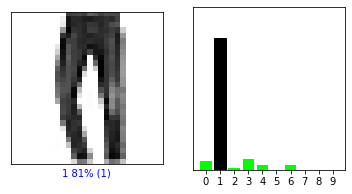

<Figure size 432x288 with 0 Axes>

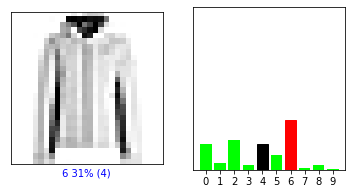

<Figure size 432x288 with 0 Axes>

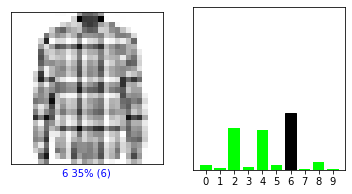

<Figure size 432x288 with 0 Axes>

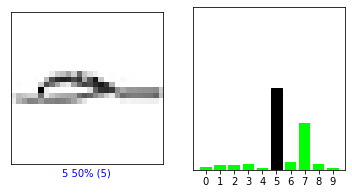

<Figure size 432x288 with 0 Axes>

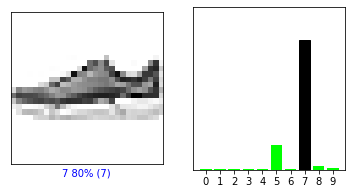

<Figure size 432x288 with 0 Axes>

In [85]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions7[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions7[i],  test_labels)
  plt.show()
  plt.clf()

Como podemos ver, esta red tenía: loss: 0.7630 y accuracy: 0.7523; a esto se debe que confunde varias imagenes como puede ser las camisetas con chaquetas, camisas o jerseys.


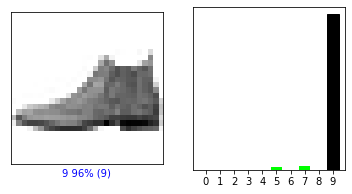

<Figure size 432x288 with 0 Axes>

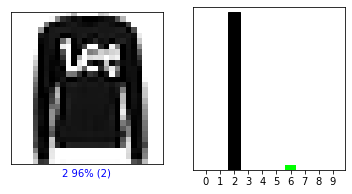

<Figure size 432x288 with 0 Axes>

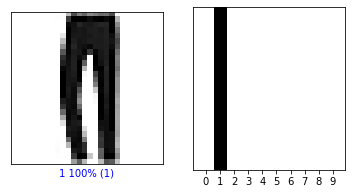

<Figure size 432x288 with 0 Axes>

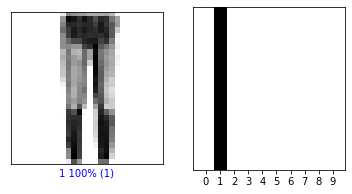

<Figure size 432x288 with 0 Axes>

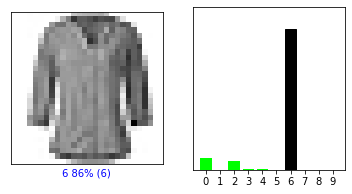

<Figure size 432x288 with 0 Axes>

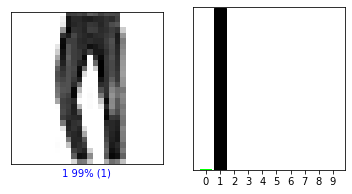

<Figure size 432x288 with 0 Axes>

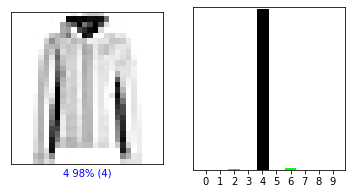

<Figure size 432x288 with 0 Axes>

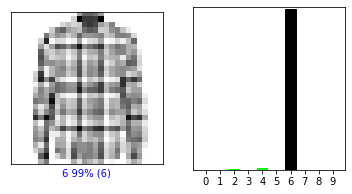

<Figure size 432x288 with 0 Axes>

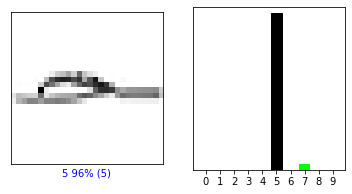

<Figure size 432x288 with 0 Axes>

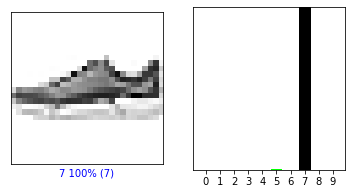

<Figure size 432x288 with 0 Axes>

In [86]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions8[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions8[i],  test_labels)
  plt.show()
  plt.clf()

### **OPTIMIZADOR ADAM**

Mejoramos el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por **adam**.

In [87]:
##función de activación: sigmoid
##optimizador: sgd
network31 = models.Sequential()
network31.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network31.add(layers.Dense(10, activation='softmax', name = 'capa2'))

In [88]:
network31.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [89]:
network31.add(layers.Flatten(input_shape=(28,28)))

In [90]:
network31.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4907 - accuracy: 0.5967
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8651 - accuracy: 0.7837
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6648 - accuracy: 0.8139
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5751 - accuracy: 0.8260
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.8343


Cambiando el optimizador, podemos comprobar que el modelo mejora con diferencia

**Adam** (Adaptive moment estimation)

El algoritmo de Adam es diferente del sgd. El sgd mantiene una tasa de aprendizaje única (alfa) para actualizar todos los pesos, y la tasa de aprendizaje no cambia durante el proceso de entrenamiento, Mientras que Adam calcula una tasa de aprendizaje diferente para cada peso.

El algoritmo de Adam obtiene las ventajas de los algoritmos AdaGrad y RMSProp. Adam no solo calcula la tasa de aprendizaje de parámetros adaptativos en función del valor medio del primer momento como el algoritmo RMSProp, sino que también hace un uso completo del valor medio del segundo momento del gradiente (es decir, la varianza no centrada). 


La función de pérdida es la misma que hemos utlizado anteriormente **spars_categorical_crossentropy** que se utiliza como señal de retroalimentación para aprender los tensores de peso.

### **MATRIZ DE CONFUSIÓN**

In [91]:
#import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [92]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels)

Vamos a ver las matrices de confusión para el mejor y el peor caso de nuestros modelos, tanto con 10 neuronas de entrada como con 512

**Matriz modelo 2**

Mejor caso para 10 neuronas

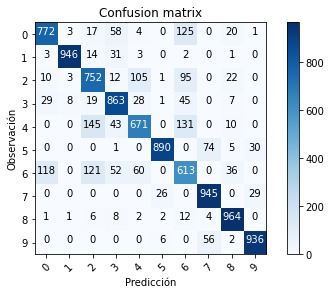

In [93]:
# Predict the values from the validation dataset
Y_pred2 = network2.predict(test_images)
Y_pred_classes2 = np.argmax(Y_pred2, axis = 1) 
Y_true2 = np.argmax(test_labels, axis = 1) 
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2) 
plot_confusion_matrix(confusion_mtx2, classes = range(10))

Observamos que en la diagonal se encuentran los valores más altos, es decir que su precisión es bastante buena. Esto significa que la imagen que corresponde a la etiqueta número x, el modelo predice que es x.

Por ejemplo, la imagen 8 (bolsa) es la que mejor predice, ya que de 1000 casos, ha acertado 964, 6 lo ha confundido con jersey, 8 con una vestido y 12 con camisa

**Matriz modelo 3**

Peor modelo para 10 neuronas

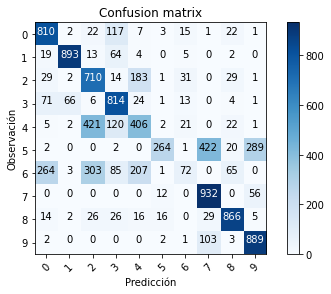

In [94]:
Y_pred3 = network3.predict(test_images)
Y_pred_classes3 = np.argmax(Y_pred3, axis = 1) 
Y_true3 = np.argmax(test_labels, axis = 1) 
confusion_mtx3 = confusion_matrix(Y_true3, Y_pred_classes3) 
plot_confusion_matrix(confusion_mtx3, classes = range(10))

En este caso, observamos que en la diagonal ya no se encuentran los valores más altos.

La imagen 6(camisa), se piensa que es un jersey ya que de los mil casos, 303 ha dicho que era un jersey y sólo 72 ha dicho que era una camisa.

**Matriz modelo 6**

Mejor caso para 512 neuronas

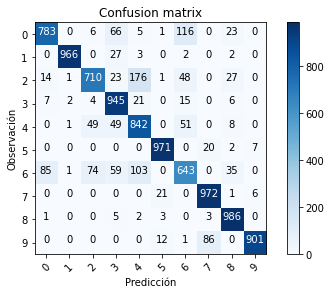

In [95]:
Y_pred6 = network6.predict(test_images)
Y_pred_classes6 = np.argmax(Y_pred6, axis = 1) 
Y_true6 = np.argmax(test_labels, axis = 1) 
confusion_mtx6 = confusion_matrix(Y_true6, Y_pred_classes6) 
plot_confusion_matrix(confusion_mtx6, classes = range(10))

Al igual que en el modelo 2, los valores más altos se encuentran en la diagonal, por lo que está prediciendo bien las imágenes.


**Matriz modelo 7**

Peor caso para 512 neuronas

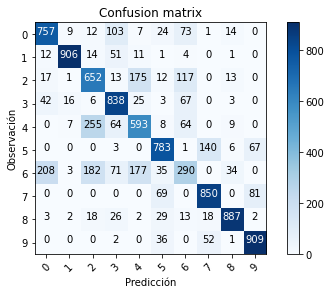

In [96]:
Y_pred7 = network7.predict(test_images)
Y_pred_classes7 = np.argmax(Y_pred7, axis = 1) 
Y_true7 = np.argmax(test_labels, axis = 1) 
confusion_mtx7 = confusion_matrix(Y_true7, Y_pred_classes7) 
plot_confusion_matrix(confusion_mtx7, classes = range(10))

Vemos que en la diagonal están los valores más altos, pero el número de errores que ha cometido a su vez también es muy alto.

### **GRÁFICAS**

Para poder ver como se comporta el modelo respecto a la precisión y pérdida con datos que no ha visto nunca, separamos 10000 imágenes de nuestros datos de entrenamiento y las guardamos como datos de validación, los cuales no forman parte del entrenamiento

In [97]:
import numpy as np

x_train = np.asarray(train_images).astype('float32')
x_test = np.asarray(test_images).astype('float32')
x_train
# Convertimos el vector de etiquetas en un tensor Numpy de coma flotante  
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [98]:
network7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = network7.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/50
98/98 [==============================] - 3s 24ms/step - loss: 0.7347 - acc: 0.7566 - val_loss: 0.7305 - val_acc: 0.7608
Epoch 2/50
98/98 [==============================] - 2s 23ms/step - loss: 0.7265 - acc: 0.7589 - val_loss: 0.7224 - val_acc: 0.7614
Epoch 3/50
98/98 [==============================] - 2s 23ms/step - loss: 0.7190 - acc: 0.7607 - val_loss: 0.7151 - val_acc: 0.7629
Epoch 4/50
98/98 [==============================] - 2s 23ms/step - loss: 0.7119 - acc: 0.7617 - val_loss: 0.7084 - val_acc: 0.7654
Epoch 5/50
98/98 [==============================] - 2s 23ms/step - loss: 0.7051 - acc: 0.7640 - val_loss: 0.7020 - val_acc: 0.7678
Epoch 6/50
98/98 [==============================] - 2s 23ms/step - loss: 0.6986 - acc: 0.7648 - val_loss: 0.6956 - val_acc: 0.7691
Epoch 7/50
98/98 [==============================] - 2s 23ms/step - loss: 0.6926 - acc: 0.7657 - val_loss: 0.6902 - val_acc: 0.7687
Epoch 8/50
98/98 [==============================] - 2s 23ms/step - loss: 0.6869 - a

Como con 25 iteraciones hemos visto que no se produce sobreentrenamiento, aplicamos 50 para ver como se comporta (epochs = 50).

In [99]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['acc'])
print(history_dict['val_loss'])
print(history_dict['val_acc'])

[0.7346899509429932, 0.7265082597732544, 0.7190191149711609, 0.7118527889251709, 0.7050682902336121, 0.6986331939697266, 0.6926467418670654, 0.6868607997894287, 0.6813501715660095, 0.6761451363563538, 0.6710982322692871, 0.6662700772285461, 0.6617090106010437, 0.6572924256324768, 0.652971625328064, 0.6489179134368896, 0.6449756622314453, 0.6411089301109314, 0.6373603343963623, 0.6339022517204285, 0.6303884983062744, 0.6270440220832825, 0.623734712600708, 0.6205991506576538, 0.6175686717033386, 0.6146089434623718, 0.6117305755615234, 0.6088586449623108, 0.6061351299285889, 0.6034170985221863, 0.6008180975914001, 0.598322331905365, 0.5957929491996765, 0.5934730172157288, 0.5910623669624329, 0.5887588858604431, 0.5864320397377014, 0.5842713713645935, 0.5821366906166077, 0.5800656080245972, 0.5779945254325867, 0.5759332180023193, 0.573989748954773, 0.5721009969711304, 0.570210337638855, 0.5683971047401428, 0.5665728449821472, 0.5648103356361389, 0.5630649328231812, 0.5614060163497925]
[0.7

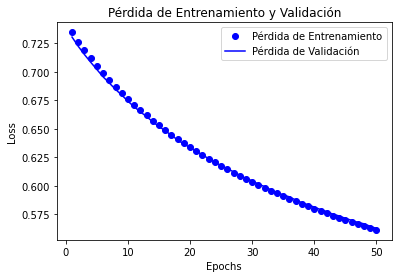

In [100]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Podemos ver que a más iteraciones en la red 7, menos pérdida tienen tanto los datos de entrenamiento como los datos de validación. En este caso, son prácticamente los mismos valores para ambos conjuntos de datos.

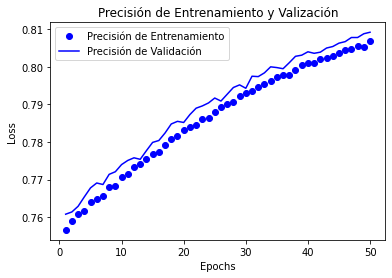

In [101]:
plt.clf()   # Limpia la figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

En cuanto a la precisión, a más iteraciones, más precisión. En los datos de validación podemos apreciar más picos, pero la tendencia es aumentar la precisión según aumenta la precisión.

### **CONCLUSIONES**

Como resumen, nos damos cuenta que la función relu mejora significativamente nuestros modelos al igual que el optimizador rmsprop. 

La función de activación *relu* ayuda a las redes neuronales a formar modelos de aprendizaje profundo, esto permite que el modelo funcione mejor y aprenda más rápido.

También vemos que en un rango de 25-50 iteraciones, aunque podríamos esperar un sobreentrenamiento, esto no sucede, lo que sí ocurre es que la precisión cada vez aumenta más lentamente y la perdida se reduce menos cada vez.
Aún asi, vemos que a partir de la iteración 18 el valor no cambia significativamente, por lo que podríamos ahorrarnos esas iteraciones ya que realmente no están mejorando el sistema y el tiempo de ejecución si que aumenta.